In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Model
import cv2                
import numpy as np          
import os                  
from random import shuffle      
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir("C:/Users/Deeksha Priya/Desktop/plant/PlantVillage")

In [4]:
cur_path = os.getcwd()

In [5]:
cur_path

'C:\\Users\\Deeksha Priya\\Desktop\\plant\\PlantVillage'

In [6]:
img_size =128
input_shape=(img_size,img_size,3)

In [7]:
def label_imgv2(word_label):
    if word_label == 'Pepper__bell___Bacterial_spot': return 0
    elif word_label == 'Pepper__bell___healthy': return 1
    elif word_label == 'Potato___Early_blight': return 2
    elif word_label == 'Potato___healthy': return 3
    elif word_label == 'Potato___Late_blight': return 4
    elif word_label == 'Tomato__Target_Spot': return 5
    elif word_label == 'Tomato__Tomato_mosaic_virus': return 6
    elif word_label == 'Tomato__Tomato_YellowLeaf__Curl_Virus': return 7
    elif word_label == 'Tomato_Bacterial_spot': return 8
    elif word_label == 'Tomato_Early_blight': return 9
    elif word_label == 'Tomato_healthy': return 10
    elif word_label == 'Tomato_Late_blight': return 11
    elif word_label == 'Tomato_Leaf_Mold': return 12
    elif word_label == 'Tomato_Septoria_leaf_spot': return 13
    elif word_label == 'Tomato_Spider_mites_Two_spotted_spider_mite': return 14

In [8]:
def create_train_data():
    training_data = []
    
    for folder in os.listdir(cur_path):
        i=0
        for img in os.listdir(cur_path+"/"+folder):
            i+=1
            path = os.path.join(cur_path+"/"+folder,img)
            
            try:
                label = label_imgv2(folder)
                img = cv2.imread(path,cv2.IMREAD_COLOR)
                img = cv2.resize(img, (img_size,img_size))
                training_data.append([np.array(img),np.array(label)])
            
            except:
                print(path)
            if i==500:
                break

    shuffle(training_data)
    return training_data

train_data = create_train_data()

In [9]:
train_y=np.array([i[1] for i in train_data])
train_x=np.array([i[0] for i in train_data]).reshape(-1,img_size,img_size,3)

train_x.shape

(7025, 128, 128, 3)

In [10]:
train_x=train_x/255
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)

In [11]:
train_datagen = ImageDataGenerator(zoom_range=0.1, rotation_range=50,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_test, y_test, batch_size=20)

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(img_size,img_size,3)))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      504       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        244       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [13]:
custom=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/20
88/88 [==============================] - 179s 2s/step - loss: 2.2798 - accuracy: 0.2760 - val_loss: 2.8377 - val_accuracy: 0.0690
Epoch 2/20
88/88 [==============================] - 185s 2s/step - loss: 1.4981 - accuracy: 0.5221 - val_loss: 3.3213 - val_accuracy: 0.0690
Epoch 3/20
88/88 [==============================] - 183s 2s/step - loss: 1.0914 - accuracy: 0.6441 - val_loss: 4.1863 - val_accuracy: 0.0698
Epoch 4/20
88/88 [==============================] - 181s 2s/step - loss: 0.8639 - accuracy: 0.7173 - val_loss: 3.9687 - val_accuracy: 0.0904
Epoch 5/20
88/88 [==============================] - 190s 2s/step - loss: 0.7215 - accuracy: 0.7587 - val_loss: 2.5983 - val_accuracy: 0.2199
Epoch 6/20
88/88 [==============================] - 185s 2s/step - loss: 0.6084 - accuracy: 0.7964 - val_loss: 1.1439 - val_accuracy: 0.6028
Epoch 7/20
88/88 [==============================] - 181s 2s/step - loss: 0.4977 - accuracy: 0.8411 - val_loss: 0.7340 - val_accuracy: 0.7537
Epoch 8/20
88

In [14]:
predictions = model.predict(x_test)
predictions

array([[1.51536893e-02, 1.48180753e-01, 5.74450642e-05, ...,
        1.04797930e-02, 8.19358408e-01, 3.64554326e-05],
       [1.03579754e-04, 1.51330279e-03, 1.01329188e-05, ...,
        2.00962815e-02, 1.01415426e-05, 9.61704586e-07],
       [8.31867695e-01, 2.02945448e-05, 1.06974051e-06, ...,
        5.18507324e-03, 1.32837959e-05, 2.19900496e-02],
       ...,
       [4.87818470e-05, 5.18989145e-06, 2.61795687e-08, ...,
        1.22364345e-05, 1.10937635e-05, 2.87350099e-06],
       [1.39502361e-02, 2.11309962e-04, 5.94215489e-05, ...,
        2.26725657e-02, 9.59360600e-01, 4.07705629e-05],
       [1.53736444e-02, 7.84850454e-06, 4.52126842e-05, ...,
        2.83315927e-01, 6.56171888e-03, 1.98295161e-01]], dtype=float32)

In [15]:
y_preds = [np.argmax(i) for i in predictions]

In [16]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 89   2   0   0   2   1   0   1   0   2   0   1   2   3   1]
 [  0  98   0   2   0   0   0   2   0   0   0   0   0   3   0]
 [  3   0  83   1   8   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0  26   4   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   1 109   0   0   0   0   1   0   3   0   0   0]
 [  0   0   0   0   2  98   1   0   0   1   1   0   0   2  11]
 [  0   0   0   0   0   1  80   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0  87   1   0   0   0   0   0   1]
 [  0   1   0   0   0   0   0   1  93   1   0   1   0   0   0]
 [  2   0   0   0   2   5   0   0   4  74   0  10   1   0   0]
 [  0   0   0   0   0   2   0   0   0   1  77   0   0   0   0]
 [  2   0   0   0   3   1   0   1   2   9   0  69   4   2   0]
 [  0   0   0   0   1   0   0   0   0   6   0   2  80   6   3]
 [  2   6   3   1   0   1   3   1   1   4   0   2   2  69   0]
 [  1   0   0   0   0   6   1   0   0   0   0   0   0   0  99]]
              precision    recall  f1-score   support


In [17]:
custom = model.fit_generator(train_generator, epochs=50, validation_data=val_generator, verbose=1)

Epoch 1/50
176/176 [==============================] - 291s 2s/step - loss: 0.9713 - accuracy: 0.6865 - val_loss: 0.4984 - val_accuracy: 0.8299
Epoch 2/50
176/176 [==============================] - 287s 2s/step - loss: 0.7265 - accuracy: 0.7527 - val_loss: 0.4958 - val_accuracy: 0.8221
Epoch 3/50
176/176 [==============================] - 282s 2s/step - loss: 0.6259 - accuracy: 0.7858 - val_loss: 0.5120 - val_accuracy: 0.8221
Epoch 4/50
176/176 [==============================] - 279s 2s/step - loss: 0.5662 - accuracy: 0.8062 - val_loss: 0.4173 - val_accuracy: 0.8448
Epoch 5/50
176/176 [==============================] - 227s 1s/step - loss: 0.5229 - accuracy: 0.8222 - val_loss: 0.5185 - val_accuracy: 0.8114
Epoch 6/50
176/176 [==============================] - 176s 999ms/step - loss: 0.4858 - accuracy: 0.8383 - val_loss: 0.3473 - val_accuracy: 0.8747
Epoch 7/50
176/176 [==============================] - 179s 1s/step - loss: 0.4716 - accuracy: 0.8375 - val_loss: 0.5087 - val_accuracy: 0.8

In [18]:
predictions = model.predict(x_test)
y_preds = [np.argmax(i) for i in predictions]

In [19]:
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 93   5   0   1   0   0   0   0   0   2   0   0   0   3   0]
 [  0 100   0   5   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  95   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  32   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   3   0 105   0   0   0   0   3   0   2   0   0   0]
 [  0   0   0   2   0  92   0   0   0   5  12   0   0   4   1]
 [  0   0   0   0   0   0  82   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  88   0   0   0   0   0   0   1]
 [  0   0   0   0   1   1   0   2  91   0   0   0   0   2   0]
 [  0   0   0   0   4   2   0   0   1  85   0   6   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  80   0   0   0   0]
 [  0   1   3   0   4   0   0   0   1   5   0  78   0   1   0]
 [  0   1   0   0   0   0   0   0   0   1   0   2  81  11   2]
 [  0   0   2   3   2   0   1   0   0   2   0   1   0  84   0]
 [  1   0   0   0   0   3   1   0   0   1   7   1   0   1  92]]
              precision    recall  f1-score   support


In [20]:
classes = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy',
           'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus',
           'Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold',
           'Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']

Tomato__Tomato_YellowLeaf__Curl_Virus


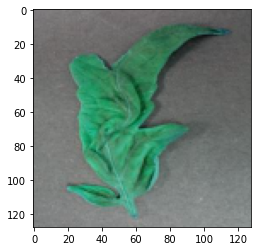

In [21]:
plt.imshow(train_x[100])
plt.show
print(classes[train_y[100]])

Tomato__Target_Spot


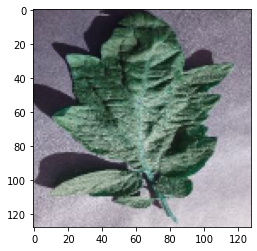

In [22]:
plt.imshow(train_x[80])
plt.show
print(classes[train_y[80]])

In [23]:
from tensorflow.keras.preprocessing import image
test=train_x[100]
test=image.img_to_array(test)
test=test.reshape((-1,img_size,img_size,3))
predictions = model.predict(test)
predictions

array([[9.5561916e-07, 3.5813903e-06, 5.3482054e-09, 1.0268823e-08,
        1.7084245e-07, 3.3938025e-07, 2.1156218e-06, 9.9509889e-01,
        3.3481678e-03, 8.3717037e-05, 1.5375639e-05, 5.4531073e-04,
        1.8320304e-06, 9.1357236e-08, 8.9941145e-04]], dtype=float32)

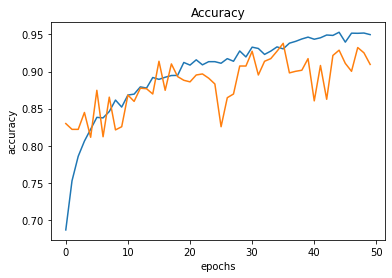

In [24]:
plt.figure(0)
plt.plot(custom.history['accuracy'], label = 'training accuracy')
plt.plot(custom.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

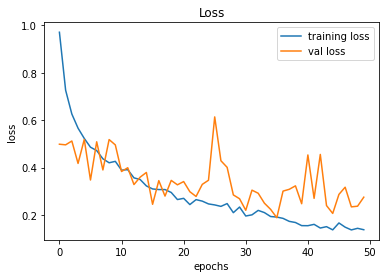

In [25]:
plt.plot(custom.history['loss'], label='training loss')
plt.plot(custom.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
model.save("model.h5")

In [27]:
model =keras.models.load_model("model.h5")